# LONDON BICYCLE DATA
This notebook contains the bicycle data downloaded from the public [Traffic for London](https://cycling.data.tfl.gov.uk/) data & [Cycling Infrastructure Database](https://data.london.gov.uk/dataset/cycling-infrastructure-database).

Dataset used here are:
- Central London Dataset
- Inner London Dataset
- Outer London Dataset
- Biking Sites Dataset
- Cycle Lane Dataset
- Cycle Park Dataset

These datasets were cleaned and merged which were then used for visualization using Tableau.

In [3]:
# Import necessary libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Central London Data Set

In [4]:
# Importing Central dataset.
cl = pd.read_csv('Central London.csv')

# View the DataFrame.
cl

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [6]:
# Dropping the columns which has 0 non-null values.
cl = cl.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [7]:
cl['Survey wave (Year)'] = cl['Survey wave (calendar quarter)'].str.split().str[0]

In [8]:
from datetime import datetime, timedelta

In [9]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048366 entries, 0 to 1048365
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [10]:
# Dropping NaN values from the dataset.
cl_drp = cl.dropna()

In [11]:
cl_drp

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey wave (Year)
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758158,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,22.0,1.0,23.0,2021
758159,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,20.0,0.0,20.0,2021
758160,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,16.0,1.0,17.0,2021
758161,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,10.0,1.0,11.0,2021


In [12]:
cl_drp[['Start_time', 'End_time']] = cl_drp['Time'].str.split(" - ", expand=True)
cl_drp['Start_time'] = pd.to_datetime(cl_drp['Start_time'], format='%H%M')
cl_drp['End_time'] = pd.to_datetime(cl_drp['End_time'], format='%H%M')
cl_drp['Duration'] = cl_drp['End_time'] - cl_drp['Start_time']

In [13]:
cl_drp

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey wave (Year),Start_time,End_time,Duration
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,1900-01-01 06:00:00,1900-01-01 06:15:00,0 days 00:15:00
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,1900-01-01 06:15:00,1900-01-01 06:30:00,0 days 00:15:00
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,1900-01-01 06:30:00,1900-01-01 06:45:00,0 days 00:15:00
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,1900-01-01 06:45:00,1900-01-01 07:00:00,0 days 00:15:00
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,1900-01-01 07:00:00,1900-01-01 07:15:00,0 days 00:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758158,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,22.0,1.0,23.0,2021,1900-01-01 20:45:00,1900-01-01 21:00:00,0 days 00:15:00
758159,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,20.0,0.0,20.0,2021,1900-01-01 21:00:00,1900-01-01 21:15:00,0 days 00:15:00
758160,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,16.0,1.0,17.0,2021,1900-01-01 21:15:00,1900-01-01 21:30:00,0 days 00:15:00
758161,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,10.0,1.0,11.0,2021,1900-01-01 21:30:00,1900-01-01 21:45:00,0 days 00:15:00


In [14]:
cl_drp['Start_time'] = cl_drp['Start_time'].apply(lambda x: x.time())
cl_drp['End_time'] = cl_drp['End_time'].apply(lambda x: x.time())

In [15]:
# Duration in miniutes.
cl_drp['Duration_min'] = cl_drp['Duration'].dt.total_seconds()/60

In [16]:
cl_drp

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Survey wave (Year),Start_time,End_time,Duration,Duration_min
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,2014,06:00:00,06:15:00,0 days 00:15:00,15.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,2014,06:15:00,06:30:00,0 days 00:15:00,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,2014,06:30:00,06:45:00,0 days 00:15:00,15.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,2014,06:45:00,07:00:00,0 days 00:15:00,15.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,2014,07:00:00,07:15:00,0 days 00:15:00,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758158,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2045 - 2100,Evening (19:00-22:00),Southbound,20.0,45.0,22.0,1.0,23.0,2021,20:45:00,21:00:00,0 days 00:15:00,15.0
758159,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2100 - 2115,Evening (19:00-22:00),Southbound,21.0,0.0,20.0,0.0,20.0,2021,21:00:00,21:15:00,0 days 00:15:00,15.0
758160,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2115 - 2130,Evening (19:00-22:00),Southbound,21.0,15.0,16.0,1.0,17.0,2021,21:15:00,21:30:00,0 days 00:15:00,15.0
758161,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",Dry,2130 - 2145,Evening (19:00-22:00),Southbound,21.0,30.0,10.0,1.0,11.0,2021,21:30:00,21:45:00,0 days 00:15:00,15.0


In [17]:
# check the column as to why it is not splitting from this 'ven, 24/01/14'.
pd.to_datetime(cl_drp['Survey date'], errors='coerce')

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
758158   NaT
758159   NaT
758160   NaT
758161   NaT
758162   NaT
Name: Survey date, Length: 743317, dtype: datetime64[ns]

In [18]:
# To remove spaces from the start and end of the strings.
cl_drp['Survey date'] = cl_drp['Survey date'].str.strip()


In [19]:
# Removing the 1st 4 characters in Survey Date.
cl_drp["Survey date"] = cl_drp["Survey date"].str[4:]


In [20]:
# Converting non-matching formats to NaT
cl_drp["Survey date"] = pd.to_datetime(cl_drp["Survey date"], errors='coerce')


In [21]:
# Count the number of missing values in the 'Survey date' column
missing_values = cl_drp['Survey date'].isnull().sum()
print(missing_values)


256


In [22]:
# Dropping the missing values.
cl_drp = cl_drp.dropna(subset=['Survey date'])


In [23]:
#converting to datetime format.
cl_drp["Survey date"] = pd.to_datetime(cl_drp["Survey date"], format='%d/%m/%y', errors='coerce')


In [24]:
# Splitting date into day, month, year.
cl_drp['day'] = pd.DatetimeIndex(cl_drp['Survey date']).day
cl_drp['month'] = pd.DatetimeIndex(cl_drp['Survey date']).month
cl_drp['year'] = pd.DatetimeIndex(cl_drp['Survey date']).year

In [25]:
# Changing to all lower case.
cl_drp[['Weather']] = cl_drp[['Weather']].apply(lambda x: x.str.lower())


In [26]:
# Dropping the columns which is not required.
cl_drp = cl_drp.drop(['Survey wave (calendar quarter)', 'Equivalent financial quarter',
                     'Survey date', 'Time', 'Start hour', 'Start minute', 'Survey wave (Year)', 'Duration'], axis=1)

In [27]:
# Checking the dataframe.
cl_drp

,Site ID,Location,Weather,Period,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Start_time,End_time,Duration_min,day,month,year
0,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,0.0,0.0,0.0,06:00:00,06:15:00,15.0,24,1,2014
1,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,15.0,0.0,15.0,06:15:00,06:30:00,15.0,24,1,2014
2,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,35.0,0.0,35.0,06:30:00,06:45:00,15.0,24,1,2014
3,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,59.0,2.0,61.0,06:45:00,07:00:00,15.0,24,1,2014
4,CENCY001,Millbank (south of Thorney Street),dry,AM peak (07:00-10:00),Northbound,73.0,0.0,73.0,07:00:00,07:15:00,15.0,24,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758158,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,22.0,1.0,23.0,20:45:00,21:00:00,15.0,21,12,2021
758159,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,20.0,0.0,20.0,21:00:00,21:15:00,15.0,21,12,2021
758160,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,16.0,1.0,17.0,21:15:00,21:30:00,15.0,21,12,2021
758161,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,10.0,1.0,11.0,21:30:00,21:45:00,15.0,21,12,2021


In [28]:
cl_drp['Weather'].unique()

array(['dry', 'wet', 'rain', 'fine', 'damp', 'showery', 'cold/rain',
       'light rain', 'slightly wet', 'rain stopped', 'road wet',
       'almost dry', 'light shower', 'rain damp', 'rain dry', 'wet damp',
       'very wet', 'v wet', 'wet - dry', 'dry - wet', 'dry - rain',
       'damp - rain', 'wet/ dry', 's. wet', 'v. wet',
       'wet intermittently', 'cloudy/ rain', 'windy/ rain', 'cold/ rain',
       'drizzle', 'lt rain', 'dry & sunny', 'spitting', 'showers',
       'cloudy', 'sunny', 'light showers', 'hazy', 'shower', 'foggy',
       'dull', 'wet/dry', 'kdry', 'partly cloudy', 'rainy', 'wet t',
       'sun', 'fair', 'slight drizzle', 'very heavy rain', 'mild',
       'wet + windy', 'blustery', 'rain/wind', 'fine windy', 'dry windy',
       'dry wet road', 'deluge', 'dry/wet', 'dry & wet', 'v light rain',
       'dry a.m wet p.m', 'wet road', 'cold', 'cloudy/rain',
       'wet & windy', 'windy', 'down pour', 'dry & very windy', 'mist',
       'cold windy dry', 'drty', 'dry (wind

In [29]:
# create a new column with the category
cl_drp['Category'] = 'Other'
cl_drp.loc[cl_drp['Weather'].str.contains(
    'wet|rain|thunder|shower|drizzly|drizzle|deluge|hail', case=False), 'Category'] = 'Wet'
cl_drp.loc[cl_drp['Weather'].str.contains(
    'dry|sun|clear', case=False), 'Category'] = 'Dry'
cl_drp.loc[cl_drp['Weather'].str.contains(
    'wind|gale|windy', case=False), 'Category'] = 'Windy'

In [30]:
# Creating a new column
cl_drp = cl_drp.assign(area='Central London')

In [31]:
# Checking the dataframe.

cl_drp

,Site ID,Location,Weather,Period,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Start_time,End_time,Duration_min,day,month,year,Category,area
0,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,0.0,0.0,0.0,06:00:00,06:15:00,15.0,24,1,2014,Dry,Central London
1,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,15.0,0.0,15.0,06:15:00,06:30:00,15.0,24,1,2014,Dry,Central London
2,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,35.0,0.0,35.0,06:30:00,06:45:00,15.0,24,1,2014,Dry,Central London
3,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,59.0,2.0,61.0,06:45:00,07:00:00,15.0,24,1,2014,Dry,Central London
4,CENCY001,Millbank (south of Thorney Street),dry,AM peak (07:00-10:00),Northbound,73.0,0.0,73.0,07:00:00,07:15:00,15.0,24,1,2014,Dry,Central London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758158,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,22.0,1.0,23.0,20:45:00,21:00:00,15.0,21,12,2021,Dry,Central London
758159,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,20.0,0.0,20.0,21:00:00,21:15:00,15.0,21,12,2021,Dry,Central London
758160,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,16.0,1.0,17.0,21:15:00,21:30:00,15.0,21,12,2021,Dry,Central London
758161,CENCY702,Haymarket,dry,Evening (19:00-22:00),Southbound,10.0,1.0,11.0,21:30:00,21:45:00,15.0,21,12,2021,Dry,Central London


In [32]:
cl_drp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743061 entries, 0 to 758162
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Site ID                     743061 non-null  object 
 1   Location                    743061 non-null  object 
 2   Weather                     743061 non-null  object 
 3   Period                      743061 non-null  object 
 4   Direction                   743061 non-null  object 
 5   Number of private cycles    743061 non-null  float64
 6   Number of cycle hire bikes  743061 non-null  float64
 7   Total cycles                743061 non-null  float64
 8   Start_time                  743061 non-null  object 
 9   End_time                    743061 non-null  object 
 10  Duration_min                743061 non-null  float64
 11  day                         743061 non-null  int64  
 12  month                       743061 non-null  int64  
 13  year          

In [33]:
cl_drp['Category'].value_counts()

Dry      625770
Wet       88758
Other     26433
Windy      2100
Name: Category, dtype: int64

In [34]:
cl_drp['Duration_min'].unique()

array([15.])

### Inner London Data Set

In [35]:
# Importing Inner London dataset.
il = pd.read_csv('Inner London.csv')

# View the DataFrame.
il

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
il.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

In [37]:
missing_values = il.isna().sum()
print(missing_values)

Survey wave (year)            91392
Site ID                       91392
Location                      91392
Survey date                   94144
Weather                       96066
Time                          91398
Period                        91398
Direction                     91392
Start hour                    91398
Start minute                  91398
Number of private cycles      91392
Number of cycle hire bikes    91392
Total cycles                  91392
dtype: int64


In [38]:
# checking missing values.
missing_values_df = il.isna()
missing_values_df

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615163,True,True,True,True,True,True,True,True,True,True,True,True,True
615164,True,True,True,True,True,True,True,True,True,True,True,True,True
615165,True,True,True,True,True,True,True,True,True,True,True,True,True
615166,True,True,True,True,True,True,True,True,True,True,True,True,True


In [39]:
# Dropping NaN values from the dataset.
il_drp = il.dropna()

In [40]:
# Check dataframe.
il_drp

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523771,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2045 - 2100,Evening (19:00-22:00),Westbound,20.0,45.0,3.0,0.0,3.0
523772,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2100 - 2115,Evening (19:00-22:00),Westbound,21.0,0.0,2.0,0.0,2.0
523773,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2115 - 2130,Evening (19:00-22:00),Westbound,21.0,15.0,2.0,0.0,2.0
523774,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,2.0,0.0,2.0


In [41]:
il_drp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516536 entries, 0 to 523775
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          516536 non-null  float64
 1   Site ID                     516536 non-null  object 
 2   Location                    516536 non-null  object 
 3   Survey date                 516536 non-null  object 
 4   Weather                     516536 non-null  object 
 5   Time                        516536 non-null  object 
 6   Period                      516536 non-null  object 
 7   Direction                   516536 non-null  object 
 8   Start hour                  516536 non-null  float64
 9   Start minute                516536 non-null  float64
 10  Number of private cycles    516536 non-null  float64
 11  Number of cycle hire bikes  516536 non-null  float64
 12  Total cycles                516536 non-null  float64
dtypes: float64(6),

In [42]:
il_drp[['Start_time', 'End_time']] = il_drp['Time'].str.split(" - ", expand=True)
il_drp['Start_time'] = pd.to_datetime(il_drp['Start_time'], format='%H%M')
il_drp['End_time'] = pd.to_datetime(il_drp['End_time'], format='%H%M')
il_drp['Duration'] = il_drp['End_time'] - il_drp['Start_time']

In [43]:
il_drp['Start_time'] = il_drp['Start_time'].apply(lambda x: x.time())
il_drp['End_time'] = il_drp['End_time'].apply(lambda x: x.time())

In [44]:
# Duration in miniutes.
il_drp['Duration_min'] = il_drp['Duration'].dt.total_seconds()/60

In [45]:
# check the column as to why it is not splitting from this 'mer, 24/01/14'.
pd.to_datetime(il_drp['Survey date'], errors='coerce')

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
523771   NaT
523772   NaT
523773   NaT
523774   NaT
523775   NaT
Name: Survey date, Length: 516536, dtype: datetime64[ns]

In [46]:
# To remove spaces from the start and end of the strings.
il_drp['Survey date'] = il_drp['Survey date'].str.strip()

In [47]:
# Removing the 1st 4 characters in Survey Date.
il_drp["Survey date"] = il_drp["Survey date"].str[4:]

In [48]:
# Converting non-matching formats to NaT
il_drp["Survey date"] = pd.to_datetime(il_drp["Survey date"], errors='coerce')

In [49]:
# Count the number of missing values in the 'Survey date' column
missing_values = il_drp['Survey date'].isnull().sum()
print(missing_values)

0


In [50]:
#converting to datetime format.
il_drp["Survey date"] = pd.to_datetime(il_drp["Survey date"], format='%d/%m/%y', errors='coerce')

In [51]:
# Splitting date into day, month, year.
il_drp['day'] = pd.DatetimeIndex(il_drp['Survey date']).day
il_drp['month'] = pd.DatetimeIndex(il_drp['Survey date']).month
il_drp['year'] = pd.DatetimeIndex(il_drp['Survey date']).year

In [52]:
# Changing to all lower case.
il_drp[['Weather']] = il_drp[['Weather']].apply(lambda x: x.str.lower())

In [53]:
il_drp

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Start_time,End_time,Duration,Duration_min,day,month,year
0,2015.0,INNCY001,Grove Road,2015-05-20,dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0,06:00:00,06:15:00,0 days 00:15:00,15.0,20,5,2015
1,2015.0,INNCY001,Grove Road,2015-05-20,dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0,06:15:00,06:30:00,0 days 00:15:00,15.0,20,5,2015
2,2015.0,INNCY001,Grove Road,2015-05-20,dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0,06:30:00,06:45:00,0 days 00:15:00,15.0,20,5,2015
3,2015.0,INNCY001,Grove Road,2015-05-20,dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0,06:45:00,07:00:00,0 days 00:15:00,15.0,20,5,2015
4,2015.0,INNCY001,Grove Road,2015-05-20,dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0,07:00:00,07:15:00,0 days 00:15:00,15.0,20,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523771,2021.0,INNCY597,Augustus Road,2021-05-26,dry,2045 - 2100,Evening (19:00-22:00),Westbound,20.0,45.0,3.0,0.0,3.0,20:45:00,21:00:00,0 days 00:15:00,15.0,26,5,2021
523772,2021.0,INNCY597,Augustus Road,2021-05-26,dry,2100 - 2115,Evening (19:00-22:00),Westbound,21.0,0.0,2.0,0.0,2.0,21:00:00,21:15:00,0 days 00:15:00,15.0,26,5,2021
523773,2021.0,INNCY597,Augustus Road,2021-05-26,dry,2115 - 2130,Evening (19:00-22:00),Westbound,21.0,15.0,2.0,0.0,2.0,21:15:00,21:30:00,0 days 00:15:00,15.0,26,5,2021
523774,2021.0,INNCY597,Augustus Road,2021-05-26,dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,2.0,0.0,2.0,21:30:00,21:45:00,0 days 00:15:00,15.0,26,5,2021


In [54]:
# Dropping the columns which is not required.
il_drp = il_drp.drop(['Survey wave (year)', 'Survey date',
                     'Time', 'Start hour', 'Start minute', 'Duration'], axis=1)

In [55]:
il_drp['Weather'].unique()

array(['dry', 'dry                         9', 'wet', 'warm + dry',
       's.wet', 's/w', 'sunny', 'cloudy/sunny', 'cloudy', 'cloudy/rain',
       'cloudy/dry', 'rain', 'druy', 'mix wet/dry', 'drizzle',
       'dry & windy', 'light showers', 'dry/hot', 'sun', 'fine',
       'very windy', 'mizzle', 'windy/rain', 'dry warm', 'showers',
       'wet/dry', 'high wind', 'dry wet road', 'wet/damp', 'dry/sunny',
       'dark/cloudy', 'shower', 'dry/sun', 'dry/overcast', 'overcast',
       'light rain', 'shower/dry', 'down pour', 'sleet', 'wet (shower)',
       'spitting', 'dry sunny', 'heavy rain', 'drizzle/cloudy', 'dry/wet',
       'dull', 'damp', 'cloud', 'dry/drizzle', 'fair', 'rain/sleet',
       'dry cold', 'dull/damp', 'hail stone', 'hot', 'dry-wet', 'n/a',
       'too cold', 'overcast/dry', 'bright/dry',
       'overcast/rain heavy showers', 'heavy thunder', 'wet/mix',
       'thunder', 'sun/cloudy', 'snow', 'dry/cloudy',
       'dry road still wet', 'windy', 'drizzle/wet', 'sunny (ho

In [56]:
# create a new column with the category
il_drp['Category'] = 'Other'
il_drp.loc[il_drp['Weather'].str.contains(
    'wet|rain|thunder|shower|drizzly|drizzle|deluge|hail', case=False), 'Category'] = 'Wet'
il_drp.loc[il_drp['Weather'].str.contains(
    'dry|sun|clear', case=False), 'Category'] = 'Dry'
il_drp.loc[il_drp['Weather'].str.contains(
    'wind|gale|windy', case=False), 'Category'] = 'Windy'

In [57]:
# Creating a new column
il_drp = il_drp.assign(area='Inner London')

In [58]:
# Checking the data frame.
il_drp

,Site ID,Location,Weather,Period,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Start_time,End_time,Duration_min,day,month,year,Category,area
0,INNCY001,Grove Road,dry,Early Morning (06:00-07:00),Northbound,1.0,0.0,1.0,06:00:00,06:15:00,15.0,20,5,2015,Dry,Inner London
1,INNCY001,Grove Road,dry,Early Morning (06:00-07:00),Northbound,2.0,0.0,2.0,06:15:00,06:30:00,15.0,20,5,2015,Dry,Inner London
2,INNCY001,Grove Road,dry,Early Morning (06:00-07:00),Northbound,2.0,0.0,2.0,06:30:00,06:45:00,15.0,20,5,2015,Dry,Inner London
3,INNCY001,Grove Road,dry,Early Morning (06:00-07:00),Northbound,4.0,0.0,4.0,06:45:00,07:00:00,15.0,20,5,2015,Dry,Inner London
4,INNCY001,Grove Road,dry,AM peak (07:00-10:00),Northbound,4.0,0.0,4.0,07:00:00,07:15:00,15.0,20,5,2015,Dry,Inner London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523771,INNCY597,Augustus Road,dry,Evening (19:00-22:00),Westbound,3.0,0.0,3.0,20:45:00,21:00:00,15.0,26,5,2021,Dry,Inner London
523772,INNCY597,Augustus Road,dry,Evening (19:00-22:00),Westbound,2.0,0.0,2.0,21:00:00,21:15:00,15.0,26,5,2021,Dry,Inner London
523773,INNCY597,Augustus Road,dry,Evening (19:00-22:00),Westbound,2.0,0.0,2.0,21:15:00,21:30:00,15.0,26,5,2021,Dry,Inner London
523774,INNCY597,Augustus Road,dry,Evening (19:00-22:00),Westbound,2.0,0.0,2.0,21:30:00,21:45:00,15.0,26,5,2021,Dry,Inner London


In [59]:
il_drp['Category'].value_counts()

Dry      446357
Wet       60357
Other      9426
Windy       396
Name: Category, dtype: int64

### Outer London data set.

In [60]:
# Importing Outer London dataset.
ol = pd.read_csv('Outer London.csv')

# View the DataFrame.
ol

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,1,0,0,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,2,0,0,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,0,0,0,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,0,0,0,0


In [61]:
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [62]:
# Check & print missing values.
missing_values_ol = ol.isna().sum()
print(missing_values_ol)

Survey wave (year)             0
Site ID                        0
Location                       0
Survey date                 1168
Weather                      968
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
dtype: int64


In [63]:
# Impute missing values in "Survey date" column
# Compute the most common date
most_common_date = ol['Survey date'].mode()[0]
# Replace missing values with the most common date
ol['Survey date'] = ol['Survey date'].fillna(most_common_date)

# Impute missing values in "Weather" column
# Compute the most common weather category
most_common_weather = ol['Weather'].mode()[0]
# Replace missing values with the most common weather category
ol['Weather'] = ol['Weather'].fillna(most_common_weather)

# Check the missing value rate after imputation
missing_values2 = ol.isnull().sum()
print(missing_values2)

Survey wave (year)          0
Site ID                     0
Location                    0
Survey date                 0
Weather                     0
Time                        0
Period                      0
Direction                   0
Start hour                  0
Start minute                0
Number of male cycles       0
Number of female cycles     0
Number of unknown cycles    0
Total cycles                0
dtype: int64


In [64]:
# Check Dataframe
ol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               375660 non-null  object
 4   Weather                   375660 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [65]:
ol[['Start_time', 'End_time']] = ol['Time'].str.split(" - ", expand=True)
ol['Start_time'] = pd.to_datetime(ol['Start_time'], format='%H%M')
ol['End_time'] = pd.to_datetime(ol['End_time'], format='%H%M')
ol['Duration'] = ol['End_time'] - ol['Start_time']

In [66]:
ol['Start_time'] = ol['Start_time'].apply(lambda x: x.time())
ol['End_time'] = ol['End_time'].apply(lambda x: x.time())

In [67]:
# Duration in miniutes.
ol['Duration_min'] = ol['Duration'].dt.total_seconds()/60

In [68]:
# To remove spaces from the start and end of the strings.
ol['Survey date'] = ol['Survey date'].str.strip()

In [69]:
# Removing the 1st 4 characters in Survey Date.
ol["Survey date"] = ol["Survey date"].str[4:]

In [70]:
# Converting non-matching formats to NaT
ol["Survey date"] = pd.to_datetime(ol["Survey date"], errors='coerce')

In [71]:
#converting to datetime format.
ol["Survey date"] = pd.to_datetime(ol["Survey date"], format='%d/%m/%y', errors='coerce')

In [72]:
# Splitting date into day, month, year.
ol['day'] = pd.DatetimeIndex(ol['Survey date']).day
ol['month'] = pd.DatetimeIndex(ol['Survey date']).month
ol['year'] = pd.DatetimeIndex(ol['Survey date']).year

In [73]:
# Changing to all lower case.
ol[['Weather']] = ol[['Weather']].apply(lambda x: x.str.lower())

In [74]:
ol['Weather'].unique()

array(['dry', 'wet', 'showers', 'cloudy', 'rain', 'dry chill', 'sunny',
       'cloudy sunny', 'sun setting', 'dry/cold', 'dry cold',
       'cold/sunny', 'cold/cloudy', 'sunny overcast', 'sunny/cloudy',
       'dry dark', 'fine', 'good', 'dry very windy', 'wet/dry',
       'cloudy/rain/sunny', 'cloudy + sunny', 'sunny + cloudy',
       'dry/sunny', 'dry/windy', 'wet/windy', 'wet/v.windy', 'fine + dry',
       'fine + hot', 'cloudy/sunny', 'dry/dark', 'dry/good', 'fine/dry',
       'warm + dry', 'windy', 'bright + cloudy', 'dark/dry', 'cloudy/dry',
       'cloudy + rain', 'rain & cloudy', 'raining', 'dry/mild', 'cold',
       'partly sunny', 'rain/cloudy', 'cloudy/windy', 'windy + sunny',
       'sunsetting + windy', 'dark cloudy', 'dark dry', 'bright', 'dull',
       'heavy rain', 'n/a', 'intermittent light drizzle', 'heavy shower',
       'light rain', 'dry hot!!', 'lt rain', 'heavy shr', 'dry & sunny',
       'dry/wet road', 'dry with wet road', 'dry/wet', 'dry & sun',
       'drizz

In [75]:
# create a new column with the category
ol['Category'] = 'Other'
ol.loc[ol['Weather'].str.contains(
    'wet|rain|thunder|shower|drizzly|drizzle|deluge|hail', case=False), 'Category'] = 'Wet'
ol.loc[ol['Weather'].str.contains(
    'dry|sun|clear', case=False), 'Category'] = 'Dry'
ol.loc[ol['Weather'].str.contains(
    'wind|gale|windy', case=False), 'Category'] = 'Windy'

In [76]:
ol['Category'].value_counts()

Dry      328169
Wet       42803
Other      4214
Windy       474
Name: Category, dtype: int64

In [77]:
ol

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,...,Number of unknown cycles,Total cycles,Start_time,End_time,Duration,Duration_min,day,month,year,Category
0,2015,OUTCY001,High Road Leyton,2015-06-26,dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,...,0,3,06:00:00,06:15:00,0 days 00:15:00,15.0,26,6,2015,Dry
1,2015,OUTCY001,High Road Leyton,2015-06-26,dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,...,0,3,06:15:00,06:30:00,0 days 00:15:00,15.0,26,6,2015,Dry
2,2015,OUTCY001,High Road Leyton,2015-06-26,dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,...,0,2,06:30:00,06:45:00,0 days 00:15:00,15.0,26,6,2015,Dry
3,2015,OUTCY001,High Road Leyton,2015-06-26,dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,...,0,4,06:45:00,07:00:00,0 days 00:15:00,15.0,26,6,2015,Dry
4,2015,OUTCY001,High Road Leyton,2015-06-26,dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,...,0,5,07:00:00,07:15:00,0 days 00:15:00,15.0,26,6,2015,Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,2021,OUTCY451,Thames Path (Lower Ham Road),2021-06-18,wet,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,...,0,1,20:45:00,21:00:00,0 days 00:15:00,15.0,18,6,2021,Wet
375656,2021,OUTCY451,Thames Path (Lower Ham Road),2021-06-18,wet,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,...,0,2,21:00:00,21:15:00,0 days 00:15:00,15.0,18,6,2021,Wet
375657,2021,OUTCY451,Thames Path (Lower Ham Road),2021-06-18,wet,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,...,0,0,21:15:00,21:30:00,0 days 00:15:00,15.0,18,6,2021,Wet
375658,2021,OUTCY451,Thames Path (Lower Ham Road),2021-06-18,wet,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,...,0,0,21:30:00,21:45:00,0 days 00:15:00,15.0,18,6,2021,Wet


In [78]:
# Dropping the columns which is not required.
ol = ol.drop(['Survey wave (year)', 'Survey date',
                     'Time', 'Start hour', 'Start minute', 'Duration'], axis=1)

In [79]:
# Creating a new column
ol = ol.assign(area='Outer London')

In [80]:
# Check the dataframe.
ol

,Site ID,Location,Weather,Period,Direction,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Start_time,End_time,Duration_min,day,month,year,Category,area
0,OUTCY001,High Road Leyton,dry,Early Morning (06:00-07:00),Northbound,2,1,0,3,06:00:00,06:15:00,15.0,26,6,2015,Dry,Outer London
1,OUTCY001,High Road Leyton,dry,Early Morning (06:00-07:00),Northbound,3,0,0,3,06:15:00,06:30:00,15.0,26,6,2015,Dry,Outer London
2,OUTCY001,High Road Leyton,dry,Early Morning (06:00-07:00),Northbound,2,0,0,2,06:30:00,06:45:00,15.0,26,6,2015,Dry,Outer London
3,OUTCY001,High Road Leyton,dry,Early Morning (06:00-07:00),Northbound,4,0,0,4,06:45:00,07:00:00,15.0,26,6,2015,Dry,Outer London
4,OUTCY001,High Road Leyton,dry,AM peak (07:00-10:00),Northbound,4,1,0,5,07:00:00,07:15:00,15.0,26,6,2015,Dry,Outer London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375655,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,1,0,0,1,20:45:00,21:00:00,15.0,18,6,2021,Wet,Outer London
375656,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,2,0,0,2,21:00:00,21:15:00,15.0,18,6,2021,Wet,Outer London
375657,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0,0,0,0,21:15:00,21:30:00,15.0,18,6,2021,Wet,Outer London
375658,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0,0,0,0,21:30:00,21:45:00,15.0,18,6,2021,Wet,Outer London


## Merging the 3 dataframes

##### Dropping few columns in all 3 dataframe before merging.

- Central London :	Number of private cycles,	Number of cycle hire bikes
- Inner	Lonond  :    Number of private cycles,	Number of cycle hire bikes
- Outer	 London  :   Number of male cycles,	    Number of female cycles,	    Number of unknown cycles


In [81]:
# Dropping the columns in Central London dataframe.
cl_drp_new = cl_drp.drop(['Number of private cycles', 'Number of cycle hire bikes'], axis=1)

In [82]:
# Dropping the columns in Inner London dataframe.
il_drp_new = il_drp.drop(['Number of private cycles', 'Number of cycle hire bikes'], axis=1)

In [83]:
# Dropping the columns in Outer London dataframe.
ol_new = ol.drop(['Number of male cycles', 'Number of female cycles',
             'Number of unknown cycles'], axis=1)

In [84]:
# Shape of the dataframes
print("Central London",cl_drp_new.shape)
print("Inner London",il_drp_new.shape)
print("Outer London",ol_new.shape)

Central London (743061, 14)
Inner London (516536, 14)
Outer London (375660, 14)


In [85]:
# Merging dataframes.
frames = [cl_drp_new, il_drp_new, ol_new]
merged_cycle_df = pd.concat(frames).reset_index()

In [86]:
# check the merged dataframe.
merged_cycle_df

,index,Site ID,Location,Weather,Period,Direction,Total cycles,Start_time,End_time,Duration_min,day,month,year,Category,area
0,0,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,0.0,06:00:00,06:15:00,15.0,24,1,2014,Dry,Central London
1,1,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,15.0,06:15:00,06:30:00,15.0,24,1,2014,Dry,Central London
2,2,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,35.0,06:30:00,06:45:00,15.0,24,1,2014,Dry,Central London
3,3,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,61.0,06:45:00,07:00:00,15.0,24,1,2014,Dry,Central London
4,4,CENCY001,Millbank (south of Thorney Street),dry,AM peak (07:00-10:00),Northbound,73.0,07:00:00,07:15:00,15.0,24,1,2014,Dry,Central London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635252,375655,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,1.0,20:45:00,21:00:00,15.0,18,6,2021,Wet,Outer London
1635253,375656,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,2.0,21:00:00,21:15:00,15.0,18,6,2021,Wet,Outer London
1635254,375657,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0.0,21:15:00,21:30:00,15.0,18,6,2021,Wet,Outer London
1635255,375658,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0.0,21:30:00,21:45:00,15.0,18,6,2021,Wet,Outer London


In [87]:
from datetime import date
merged_cycle_df["day_of_week"] = merged_cycle_df.apply(lambda row: date(
    row["year"], row["month"], row["day"]).strftime("%A"), axis=1)

In [88]:
import calendar
merged_cycle_df['month'] = merged_cycle_df['month'].apply(lambda x: calendar.month_name[x])

In [89]:
merged_cycle_df

,index,Site ID,Location,Weather,Period,Direction,Total cycles,Start_time,End_time,Duration_min,day,month,year,Category,area,day_of_week
0,0,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,0.0,06:00:00,06:15:00,15.0,24,January,2014,Dry,Central London,Friday
1,1,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,15.0,06:15:00,06:30:00,15.0,24,January,2014,Dry,Central London,Friday
2,2,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,35.0,06:30:00,06:45:00,15.0,24,January,2014,Dry,Central London,Friday
3,3,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,61.0,06:45:00,07:00:00,15.0,24,January,2014,Dry,Central London,Friday
4,4,CENCY001,Millbank (south of Thorney Street),dry,AM peak (07:00-10:00),Northbound,73.0,07:00:00,07:15:00,15.0,24,January,2014,Dry,Central London,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635252,375655,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,1.0,20:45:00,21:00:00,15.0,18,June,2021,Wet,Outer London,Friday
1635253,375656,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,2.0,21:00:00,21:15:00,15.0,18,June,2021,Wet,Outer London,Friday
1635254,375657,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0.0,21:15:00,21:30:00,15.0,18,June,2021,Wet,Outer London,Friday
1635255,375658,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0.0,21:30:00,21:45:00,15.0,18,June,2021,Wet,Outer London,Friday


#### Greater London Bike Traffic Heatmap

In [99]:
# Create a new DataFrame by merging the Central, Inner & Outer London DataFrames.
heat_df = [cl_drp.copy(), ol.copy(), il.copy()]
heatmap_df = pd.concat(heat_df).reset_index()

In [100]:
# Select columns and check missing values.
heatmap_df = heatmap_df.loc[:, ['Direction','Start hour','Total cycles']]
heatmap_df.isna().sum()

Direction         91392
Start hour      1210119
Total cycles      91392
dtype: int64

In [101]:
# Remove missing values and sense check the data.
heatmap_df = heatmap_df.dropna()
heatmap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523770 entries, 1118721 to 1642496
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Direction     523770 non-null  object 
 1   Start hour    523770 non-null  float64
 2   Total cycles  523770 non-null  float64
dtypes: float64(2), object(1)
memory usage: 16.0+ MB


In [102]:
# Change column values to integers.
heatmap_df['Start hour']= heatmap_df['Start hour'].astype(int)
heatmap_df['Total cycles']= heatmap_df['Total cycles'].astype(int)
heatmap_df

,Direction,Start hour,Total cycles
1118721,Northbound,6,1
1118722,Northbound,6,2
1118723,Northbound,6,2
1118724,Northbound,6,4
1118725,Northbound,7,4
...,...,...,...
1642492,Westbound,20,3
1642493,Westbound,21,2
1642494,Westbound,21,2
1642495,Westbound,21,2


In [103]:
# Group values by direction and start hour in a new DataFrame.
heatmap_gp = heatmap_df.groupby(['Direction','Start hour'])[['Total cycles']].sum().reset_index()
heatmap_gp

,Direction,Start hour,Total cycles
0,Eastbound,6,21828
1,Eastbound,7,65949
2,Eastbound,8,88434
3,Eastbound,9,46531
4,Eastbound,10,25059
...,...,...,...
59,Westbound,17,72297
60,Westbound,18,92654
61,Westbound,19,59850
62,Westbound,20,33617


In [104]:
# Create a pivot table from the DataFrame.
heatmap_pv = heatmap_gp.pivot_table(values='Total cycles',index='Direction',columns='Start hour')
heatmap_pv

Start hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Direction,,,,,,,,,,,,,,,,
Eastbound,21828,65949,88434,46531,25059,21895,24247,25079,24703,31915,44131,71621,84758,54903,34322,23360
Northbound,30404,89051,125103,63945,31953,28280,30990,32598,33103,42035,56546,94727,115339,74930,46233,31232
Southbound,26245,73094,119309,74176,35098,30139,31785,33211,32622,41327,56691,99887,124898,79259,45560,29190
Westbound,21640,58294,89527,52526,25638,22448,24185,24771,25049,31872,42776,72297,92654,59850,33617,20631


Text(0.5, 89.08333333333331, 'Cycle Trip Start Hour')

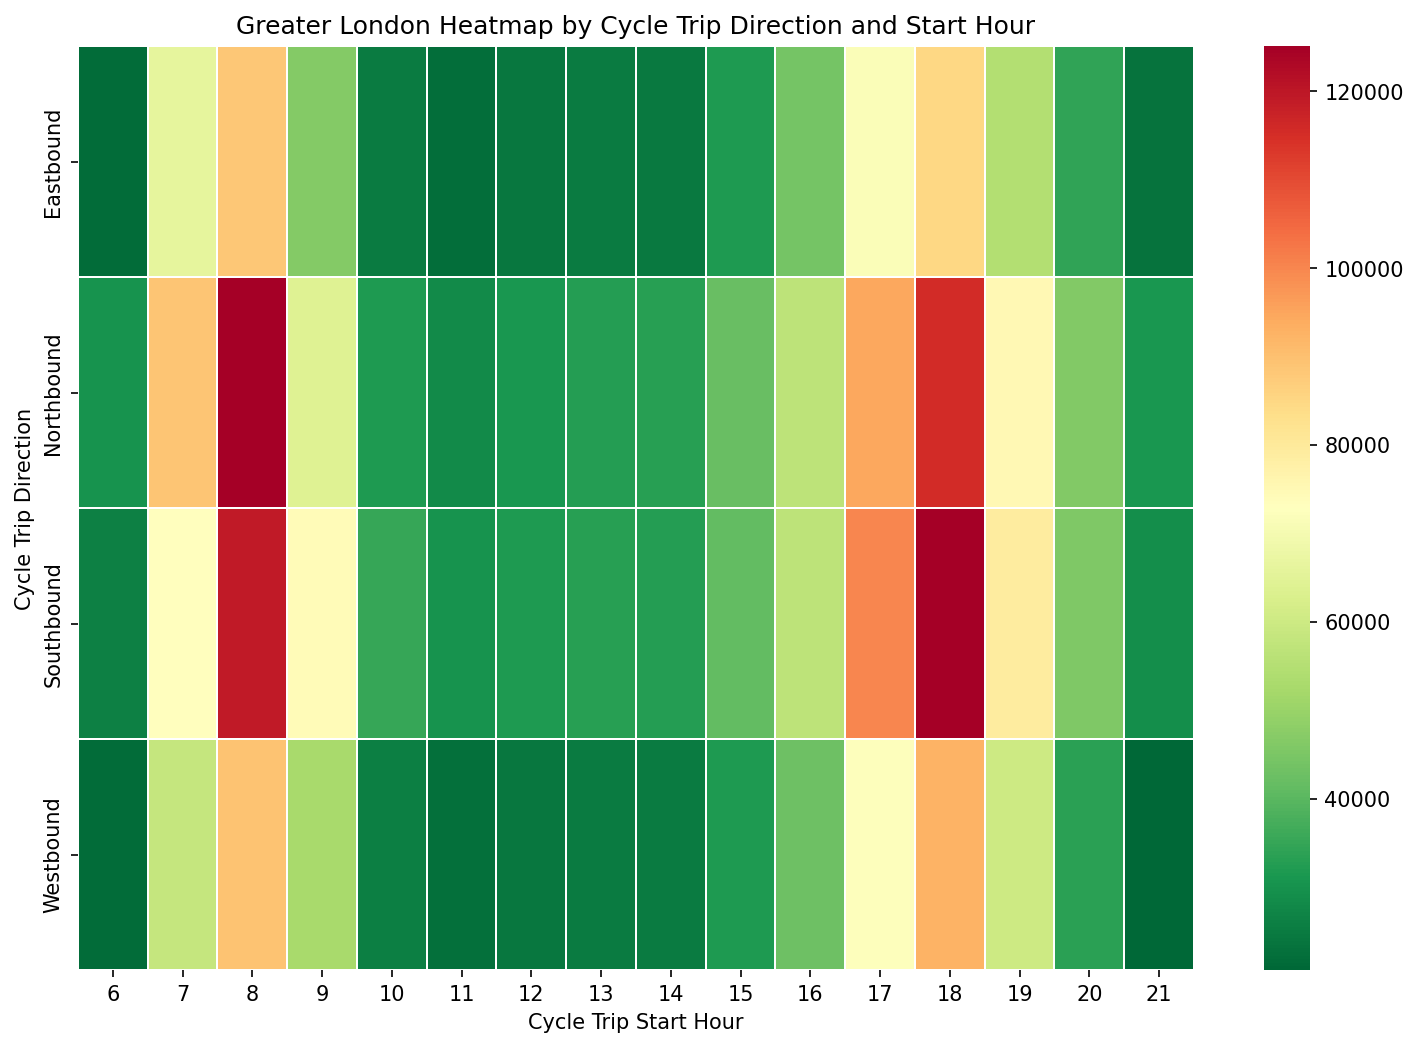

In [105]:
# Set plot size.
plt.figure(figsize=(12, 8), dpi=150)

# Plot heatmap.
sns.heatmap(heatmap_pv, cmap='RdYlGn_r', linewidths=0.1)

# Add plot title and axis labels
plt.title("Greater London Heatmap by Cycle Trip Direction and Start Hour")
plt.ylabel('Cycle Trip Direction')
plt.xlabel('Cycle Trip Start Hour')

#### Biking Sites Dataset

In [88]:
# Importing Central dataset.
bs = pd.read_excel('Biking sites.xlsx')

# View the DataFrame.
bs

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central
...,...,...,...,...,...,...,...,...
2018,QWPCY284,QWPCY,Quietway cycle surveys,516507.00,188467.00,Elmwood Avenue,Harrow,Outer
2019,QWPCY285,QWPCY,Quietway cycle surveys,515655.00,189672.00,Peel Road,Harrow,Outer
2020,QWPCY286,QWPCY,Quietway cycle surveys,515007.00,190213.00,Whitefriars Avenue,Harrow,Outer
2021,QWPCY287,QWPCY,Quietway cycle surveys,535456.00,186284.00,Chatsworth Road,Hackney,Inner


In [89]:
# Merging the 'Borough' column from 'Biking Site' to 'merged_cycle_df'
merged_cycle_df = merged_cycle_df.merge(
    bs[['UnqID', 'Borough']], left_on='Site ID', right_on='UnqID', how='left')

In [90]:
merged_cycle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635257 entries, 0 to 1635256
Data columns (total 18 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   index         1635257 non-null  int64  
 1   Site ID       1635257 non-null  object 
 2   Location      1635257 non-null  object 
 3   Weather       1635257 non-null  object 
 4   Period        1635257 non-null  object 
 5   Direction     1635257 non-null  object 
 6   Total cycles  1635257 non-null  float64
 7   Start_time    1635257 non-null  object 
 8   End_time      1635257 non-null  object 
 9   Duration_min  1635257 non-null  float64
 10  day           1635257 non-null  int64  
 11  month         1635257 non-null  object 
 12  year          1635257 non-null  int64  
 13  Category      1635257 non-null  object 
 14  area          1635257 non-null  object 
 15  day_of_week   1635257 non-null  object 
 16  UnqID         1635257 non-null  object 
 17  Borough       1635257 non-n

In [91]:
# View the updated dataframe.
merged_cycle_df

,index,Site ID,Location,Weather,Period,Direction,Total cycles,Start_time,End_time,Duration_min,day,month,year,Category,area,day_of_week,UnqID,Borough
0,0,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,0.0,06:00:00,06:15:00,15.0,24,January,2014,Dry,Central London,Friday,CENCY001,Westminster
1,1,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,15.0,06:15:00,06:30:00,15.0,24,January,2014,Dry,Central London,Friday,CENCY001,Westminster
2,2,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,35.0,06:30:00,06:45:00,15.0,24,January,2014,Dry,Central London,Friday,CENCY001,Westminster
3,3,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,61.0,06:45:00,07:00:00,15.0,24,January,2014,Dry,Central London,Friday,CENCY001,Westminster
4,4,CENCY001,Millbank (south of Thorney Street),dry,AM peak (07:00-10:00),Northbound,73.0,07:00:00,07:15:00,15.0,24,January,2014,Dry,Central London,Friday,CENCY001,Westminster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635252,375655,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,1.0,20:45:00,21:00:00,15.0,18,June,2021,Wet,Outer London,Friday,OUTCY451,Kingston upon Thames
1635253,375656,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,2.0,21:00:00,21:15:00,15.0,18,June,2021,Wet,Outer London,Friday,OUTCY451,Kingston upon Thames
1635254,375657,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0.0,21:15:00,21:30:00,15.0,18,June,2021,Wet,Outer London,Friday,OUTCY451,Kingston upon Thames
1635255,375658,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,0.0,21:30:00,21:45:00,15.0,18,June,2021,Wet,Outer London,Friday,OUTCY451,Kingston upon Thames


In [92]:
# Save the DataFrame to a CSV file
merged_cycle_df.to_csv('london_cycle_df.csv', index=False)

### Including hire data to the dataframe

In [93]:
# Merging dataframes - contains hire bikes data also.
frames2 = [cl_drp, il_drp, ol_new]
merged_cycle_df2 = pd.concat(frames2).reset_index()

In [94]:
merged_cycle_df2["day_of_week"] = merged_cycle_df2.apply(lambda row: date(
    row["year"], row["month"], row["day"]).strftime("%A"), axis=1)

In [95]:
merged_cycle_df2['month'] = merged_cycle_df2['month'].apply(lambda x: calendar.month_name[x])

In [96]:
merged_cycle_df2

,index,Site ID,Location,Weather,Period,Direction,Number of private cycles,Number of cycle hire bikes,Total cycles,Start_time,End_time,Duration_min,day,month,year,Category,area,day_of_week
0,0,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,0.0,0.0,0.0,06:00:00,06:15:00,15.0,24,January,2014,Dry,Central London,Friday
1,1,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,15.0,0.0,15.0,06:15:00,06:30:00,15.0,24,January,2014,Dry,Central London,Friday
2,2,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,35.0,0.0,35.0,06:30:00,06:45:00,15.0,24,January,2014,Dry,Central London,Friday
3,3,CENCY001,Millbank (south of Thorney Street),dry,Early Morning (06:00-07:00),Northbound,59.0,2.0,61.0,06:45:00,07:00:00,15.0,24,January,2014,Dry,Central London,Friday
4,4,CENCY001,Millbank (south of Thorney Street),dry,AM peak (07:00-10:00),Northbound,73.0,0.0,73.0,07:00:00,07:15:00,15.0,24,January,2014,Dry,Central London,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635252,375655,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,NaN,NaN,1.0,20:45:00,21:00:00,15.0,18,June,2021,Wet,Outer London,Friday
1635253,375656,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,NaN,NaN,2.0,21:00:00,21:15:00,15.0,18,June,2021,Wet,Outer London,Friday
1635254,375657,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,NaN,NaN,0.0,21:15:00,21:30:00,15.0,18,June,2021,Wet,Outer London,Friday
1635255,375658,OUTCY451,Thames Path (Lower Ham Road),wet,Evening (19:00-22:00),Southbound,NaN,NaN,0.0,21:30:00,21:45:00,15.0,18,June,2021,Wet,Outer London,Friday


In [97]:
# Merging the 'Borough' column from 'Biking Site' to 'merged_cycle_df'
merged_cycle_df2 = merged_cycle_df2.merge(
    bs[['UnqID', 'Borough']], left_on='Site ID', right_on='UnqID', how='left')

In [98]:
# Save the DataFrame with hire bike data to a CSV file
merged_cycle_df2.to_csv('london_cycle_df2.csv', index=False)

In [99]:
# Checking for duplicates in the merged dataframe.
duplicates = merged_cycle_df2.duplicated()
duplicates_count = duplicates.sum()
duplicates_count


0

### Infrastructure

In [100]:
# Importing Cycle lane dataset.
cylane_infra = pd.read_csv('cid_cycle_lanes.csv')

# View the DataFrame.
cylane_infra

,FEATURE_ID,SVDATE,CLT_CARR,CLT_SEGREG,CLT_STEPP,CLT_PARSEG,CLT_SHARED,CLT_MANDAT,CLT_ADVIS,CLT_PRIORI,...,CLT_BBYPAS,CLT_PARKR,CLT_WATERR,CLT_PTIME,CLT_ACCESS,CLT_COLOUR,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG154837,2017-10-14,True,False,False,False,FALSE,FALSE,True,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1353420094, 0.1334807414, 51.57163711..."
1,RWG154839,2017-10-14,True,False,False,False,FALSE,FALSE,True,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1318879179, 0.1312756444, 0.130977767..."
2,RWG154848,2017-10-14,True,False,False,False,FALSE,FALSE,True,TRUE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1353045555, 0.1348398673, 0.134440865..."
3,RWG154853,2017-10-15,True,False,False,False,FALSE,FALSE,True,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.141811741, 0.1412961068, 51.572411971..."
4,RWG155003,2017-10-17,True,False,False,False,FALSE,TRUE,False,FALSE,...,False,False,False,False,NaN,NONE,Barking & Dagenham,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(0.1408697848, 0.1406946062, 0.140513785..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24971,RWG154170,2017-12-06,False,False,False,False,TRUE,FALSE,False,FALSE,...,False,True,False,False,NaN,NONE,Wandsworth,https://cycleassetimages.data.tfl.gov.uk/RWG15...,https://cycleassetimages.data.tfl.gov.uk/RWG15...,"list(c(-0.2309766905, -0.230764791, -0.2303999..."
24972,RWG107707,2017-11-02,True,False,False,False,TRUE,FALSE,False,TRUE,...,False,False,False,True,Mon-Fri 7-10am 4-7pm,RED,Southwark,https://cycleassetimages.data.tfl.gov.uk/RWG10...,https://cycleassetimages.data.tfl.gov.uk/RWG10...,"list(c(-0.0749046212, -0.0745004513, 51.449729..."
24973,RWG221075,2018-02-09,False,False,False,False,TRUE,FALSE,False,FALSE,...,False,True,False,False,NaN,NONE,NaN,https://cycleassetimages.data.tfl.gov.uk/RWG22...,https://cycleassetimages.data.tfl.gov.uk/RWG22...,"list(c(-0.0189965761, -0.0189483767, -0.018160..."
24974,RWG276415,2018-03-13,False,False,False,False,TRUE,FALSE,False,FALSE,...,False,False,False,False,NaN,GREEN,NaN,https://cycleassetimages.data.tfl.gov.uk/RWG27...,https://cycleassetimages.data.tfl.gov.uk/RWG27...,"list(c(-0.0459903757, -0.0455293596, 51.562157..."


In [101]:
cylane_infra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24976 entries, 0 to 24975
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FEATURE_ID  24976 non-null  object
 1   SVDATE      24976 non-null  object
 2   CLT_CARR    24976 non-null  bool  
 3   CLT_SEGREG  24976 non-null  bool  
 4   CLT_STEPP   24976 non-null  bool  
 5   CLT_PARSEG  24976 non-null  bool  
 6   CLT_SHARED  24976 non-null  object
 7   CLT_MANDAT  24976 non-null  object
 8   CLT_ADVIS   24976 non-null  bool  
 9   CLT_PRIORI  24976 non-null  object
 10  CLT_CONTRA  24976 non-null  bool  
 11  CLT_BIDIRE  24976 non-null  bool  
 12  CLT_CBYPAS  24976 non-null  bool  
 13  CLT_BBYPAS  24976 non-null  bool  
 14  CLT_PARKR   24976 non-null  bool  
 15  CLT_WATERR  24976 non-null  bool  
 16  CLT_PTIME   24976 non-null  bool  
 17  CLT_ACCESS  2916 non-null   object
 18  CLT_COLOUR  24976 non-null  object
 19  BOROUGH     24622 non-null  object
 20  PHOTO1

In [102]:
# Check for missing values in each column
missing_cylane_infra = cylane_infra.isnull().sum()

# Print the number of missing values in each column
print(missing_cylane_infra)

FEATURE_ID        0
SVDATE            0
CLT_CARR          0
CLT_SEGREG        0
CLT_STEPP         0
CLT_PARSEG        0
CLT_SHARED        0
CLT_MANDAT        0
CLT_ADVIS         0
CLT_PRIORI        0
CLT_CONTRA        0
CLT_BIDIRE        0
CLT_CBYPAS        0
CLT_BBYPAS        0
CLT_PARKR         0
CLT_WATERR        0
CLT_PTIME         0
CLT_ACCESS    22060
CLT_COLOUR        0
BOROUGH         354
PHOTO1_URL        0
PHOTO2_URL        0
geometry          0
dtype: int64


In [103]:
cylane_infra2 = cylane_infra.drop(['CLT_ACCESS', 'CLT_COLOUR', 'PHOTO1_URL', 'PHOTO2_URL'], axis=1)

In [104]:
#converting to datetime format.
cylane_infra2["SVDATE"] = pd.to_datetime(cylane_infra2["SVDATE"], format='%d/%m/%y', errors='coerce')

In [105]:
# Importing Cycle lane dataset.
cypark_infra = pd.read_csv('cid_parking.csv')

# View the DataFrame.
cypark_infra

,FEATURE_ID,SVDATE,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,...,PRK_WHEEL,PRK_HANGAR,PRK_TIER,PRK_OTHER,PRK_PROVIS,PRK_CPT,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry
0,RWG014703,2017-09-07,False,False,False,False,False,False,False,False,...,False,True,False,False,1.0,6.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427797672, 51.5103212773)"
1,RWG014704,2017-09-07,False,False,False,False,False,False,False,False,...,False,True,False,False,1.0,6.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427846609, 51.5102610544)"
2,RWG014970,2017-06-20,False,False,False,False,True,False,False,False,...,False,False,False,False,1.0,2.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2405751224, 51.5014706358)"
3,RWG015506,2017-06-24,False,False,False,False,True,False,False,False,...,False,False,False,False,2.0,4.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2382877591, 51.5065007339)"
4,RWG015513,2017-09-07,False,False,False,False,True,False,False,False,...,False,False,False,False,2.0,4.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2384457427, 51.5062848196)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,RWG260420,2018-01-19,False,False,False,False,True,False,False,False,...,False,False,False,False,2.0,4.0,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.2945334982, 51.5953733904)"
23754,RWG260729,2018-02-02,False,False,False,False,True,False,False,False,...,False,False,False,False,2.0,4.0,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.3617845291, 51.5865533999)"
23755,RWG238365,2018-01-23,False,False,False,False,True,False,False,False,...,False,False,False,False,1.0,2.0,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.3984977491, 51.5275728185)"
23756,RWG238366,2018-01-23,False,False,False,False,True,False,False,False,...,False,False,False,False,2.0,4.0,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.4115516545, 51.5724385619)"


In [106]:
# Check for missing values in each column
missing_cypark_infra = cypark_infra.isnull().sum()

# Print the number of missing values in each column
print(missing_cypark_infra)

FEATURE_ID    0
SVDATE        0
PRK_CARR      0
PRK_COVER     0
PRK_SECURE    0
PRK_LOCKER    0
PRK_SHEFF     0
PRK_MSTAND    0
PRK_PSTAND    0
PRK_HOOP      0
PRK_POST      0
PRK_BUTERF    0
PRK_WHEEL     0
PRK_HANGAR    0
PRK_TIER      0
PRK_OTHER     0
PRK_PROVIS    2
PRK_CPT       2
BOROUGH       0
PHOTO1_URL    0
PHOTO2_URL    0
geometry      0
dtype: int64


In [107]:
cypark_infra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23758 entries, 0 to 23757
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FEATURE_ID  23758 non-null  object 
 1   SVDATE      23758 non-null  object 
 2   PRK_CARR    23758 non-null  bool   
 3   PRK_COVER   23758 non-null  bool   
 4   PRK_SECURE  23758 non-null  bool   
 5   PRK_LOCKER  23758 non-null  bool   
 6   PRK_SHEFF   23758 non-null  bool   
 7   PRK_MSTAND  23758 non-null  bool   
 8   PRK_PSTAND  23758 non-null  bool   
 9   PRK_HOOP    23758 non-null  bool   
 10  PRK_POST    23758 non-null  bool   
 11  PRK_BUTERF  23758 non-null  bool   
 12  PRK_WHEEL   23758 non-null  bool   
 13  PRK_HANGAR  23758 non-null  bool   
 14  PRK_TIER    23758 non-null  bool   
 15  PRK_OTHER   23758 non-null  bool   
 16  PRK_PROVIS  23756 non-null  float64
 17  PRK_CPT     23756 non-null  float64
 18  BOROUGH     23758 non-null  object 
 19  PHOTO1_URL  23758 non-nul

In [108]:
cypark_infra["SVDATE"] = pd.to_datetime(cypark_infra["SVDATE"], errors='coerce')

In [109]:
#converting to datetime format.
cypark_infra["SVDATE"] = pd.to_datetime(cypark_infra["SVDATE"], format='%d/%m/%y', errors='coerce')

In [110]:
# Splitting date into day, month, year.
cypark_infra['day'] = pd.DatetimeIndex(cypark_infra['SVDATE']).day
cypark_infra['month'] = pd.DatetimeIndex(cypark_infra['SVDATE']).month
cypark_infra['year'] = pd.DatetimeIndex(cypark_infra['SVDATE']).year

In [111]:
cypark_infra

,FEATURE_ID,SVDATE,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,...,PRK_OTHER,PRK_PROVIS,PRK_CPT,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,day,month,year
0,RWG014703,2017-09-07,False,False,False,False,False,False,False,False,...,False,1.0,6.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427797672, 51.5103212773)",7,9,2017
1,RWG014704,2017-09-07,False,False,False,False,False,False,False,False,...,False,1.0,6.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427846609, 51.5102610544)",7,9,2017
2,RWG014970,2017-06-20,False,False,False,False,True,False,False,False,...,False,1.0,2.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2405751224, 51.5014706358)",20,6,2017
3,RWG015506,2017-06-24,False,False,False,False,True,False,False,False,...,False,2.0,4.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2382877591, 51.5065007339)",24,6,2017
4,RWG015513,2017-09-07,False,False,False,False,True,False,False,False,...,False,2.0,4.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2384457427, 51.5062848196)",7,9,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,RWG260420,2018-01-19,False,False,False,False,True,False,False,False,...,False,2.0,4.0,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.2945334982, 51.5953733904)",19,1,2018
23754,RWG260729,2018-02-02,False,False,False,False,True,False,False,False,...,False,2.0,4.0,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.3617845291, 51.5865533999)",2,2,2018
23755,RWG238365,2018-01-23,False,False,False,False,True,False,False,False,...,False,1.0,2.0,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.3984977491, 51.5275728185)",23,1,2018
23756,RWG238366,2018-01-23,False,False,False,False,True,False,False,False,...,False,2.0,4.0,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.4115516545, 51.5724385619)",23,1,2018


In [112]:
cypark_infra["day_of_week"] = cypark_infra.apply(lambda row: date(
    row["year"], row["month"], row["day"]).strftime("%A"), axis=1)

In [113]:
cypark_infra['month'] = cypark_infra['month'].apply(lambda x: calendar.month_name[x])

In [114]:
cypark_infra

,FEATURE_ID,SVDATE,PRK_CARR,PRK_COVER,PRK_SECURE,PRK_LOCKER,PRK_SHEFF,PRK_MSTAND,PRK_PSTAND,PRK_HOOP,...,PRK_PROVIS,PRK_CPT,BOROUGH,PHOTO1_URL,PHOTO2_URL,geometry,day,month,year,day_of_week
0,RWG014703,2017-09-07,False,False,False,False,False,False,False,False,...,1.0,6.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427797672, 51.5103212773)",7,September,2017,Thursday
1,RWG014704,2017-09-07,False,False,False,False,False,False,False,False,...,1.0,6.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2427846609, 51.5102610544)",7,September,2017,Thursday
2,RWG014970,2017-06-20,False,False,False,False,True,False,False,False,...,1.0,2.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2405751224, 51.5014706358)",20,June,2017,Tuesday
3,RWG015506,2017-06-24,False,False,False,False,True,False,False,False,...,2.0,4.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2382877591, 51.5065007339)",24,June,2017,Saturday
4,RWG015513,2017-09-07,False,False,False,False,True,False,False,False,...,2.0,4.0,Hammersmith & Fulham,https://cycleassetimages.data.tfl.gov.uk/RWG01...,https://cycleassetimages.data.tfl.gov.uk/RWG01...,"c(-0.2384457427, 51.5062848196)",7,September,2017,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,RWG260420,2018-01-19,False,False,False,False,True,False,False,False,...,2.0,4.0,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.2945334982, 51.5953733904)",19,January,2018,Friday
23754,RWG260729,2018-02-02,False,False,False,False,True,False,False,False,...,2.0,4.0,Harrow,https://cycleassetimages.data.tfl.gov.uk/RWG26...,https://cycleassetimages.data.tfl.gov.uk/RWG26...,"c(-0.3617845291, 51.5865533999)",2,February,2018,Friday
23755,RWG238365,2018-01-23,False,False,False,False,True,False,False,False,...,1.0,2.0,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.3984977491, 51.5275728185)",23,January,2018,Tuesday
23756,RWG238366,2018-01-23,False,False,False,False,True,False,False,False,...,2.0,4.0,Hillingdon,https://cycleassetimages.data.tfl.gov.uk/RWG23...,https://cycleassetimages.data.tfl.gov.uk/RWG23...,"c(-0.4115516545, 51.5724385619)",23,January,2018,Tuesday


In [115]:
# Save the DataFrame to a CSV file
cypark_infra.to_csv('cypark_infra.csv', index=False)